In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
os.environ['PROJ_LIB'] = r'C:/Users/mastr/miniconda3/pkgs/proj4-5.2.0-ha925a31_1/Library/share'
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.gridspec as gridspec

In [2]:
## Function for creating a path, if needed ##
def checkDir(out_path):
    if not os.path.exists(out_path):
        os.makedirs(out_path)

def gwpstar(arr,coeff1,coeff2,gwp100):
    arr_init = coeff1*arr[0:19]*gwp100
    gwparr = arr
    gwparr[20:gwparr.shape[0]] = coeff1*(arr[20:arr.shape[0]]*gwp100)-coeff2*(arr[0:gwparr.shape[0]-20]*gwp100)
    gwparr[0:19] = arr_init
    return(gwparr)

#### ======== Set the paths ========####

# Path for netcdf files
data_path = 'C:/Users/mastr/Documents/LSCE/Carbon Budget'                         ## WINDOWS
# data_path = '/Users/mmastro/Documents/LSCE/Carbon Budget'               ## MAC OS

# Path for the output files (images, etc)
out_path = "C:/Users/mastr/Documents/LSCE/RESULTS"
#out_path = '/Users/mmastro/Documents/LSCE/RESULTS'

## BGC Parameters Fitting

In [3]:
## Find the best fit of BETA and Q10 combination according to RMSE


## Import ESM_nbp data and LUC emissions
data_path = 'C:/Users/mastr/Documents/LSCE/Carbon Budget'                         ## WINDOWS
file = "/ACC2_ESM_tuning_ssp534.xlsx"
df_esm= pd.read_excel(os.path.join(data_path+file), sheet_name = [0,6])
esm = df_esm[0].drop(columns="year", axis=1).columns
nbp_esm_cou = df_esm[0].drop(columns="year", axis=1).rolling(window=5).mean().to_numpy()

luc_emissions = df_esm[6].drop(columns="year", axis=1).to_numpy()

## Define BETA and Q10 combinations
data_path = 'C:/Users/mastr/Documents/LSCE/Carbon Budget/tuningBETA&Q10_BGC'  
file = "/LND_cnrm.csv"
df_acc2 = pd.read_csv(os.path.join(data_path+file))
params = df_acc2.drop(columns="Year", axis=1).columns


def rmse(predictions, targets):
    return np.sqrt(np.nanmean((predictions-targets)**2))

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

tas_diff=np.empty((len(esm),len(params),1),float)
for m,item in enumerate(esm):

    if m==0:
        file = "/LND_ipsl.csv"
    if m==1:
        file = "/LND_cnrm.csv"
    if m==2:
        file = "/LND_miroc.csv"
    if m==3:
        file = "/LND_ukesm.csv"
    if m==4:
        file = "/LND_ukesm.csv"

    ## Import ACC2 simulations data
    df_acc2 = pd.read_csv(os.path.join(data_path+file))
    params = df_acc2.drop(columns="Year", axis=1).columns
    nbp_acc2 = df_acc2.drop(columns="Year", axis=1).to_numpy()
    nbp_acc2 = nbp_acc2 - luc_emissions

    for i,item in enumerate(params):
        content = rmse(nbp_acc2[100:350,i],nbp_esm_cou[100:350,m])
        tas_diff[m,i,:] = content

## Find the params corrisponding to the min RMSE 
bestgcm=np.empty((len(esm),1),float)
bestparamsbgc=[]
for m,item in enumerate(esm):
        content = np.nanargmin(tas_diff[m], axis = 0)
        bestgcm[m] = content
        content1 = params[np.int(bestgcm[m][0])]
        bestparamsbgc.append(content1)
print(bestparamsbgc)
print(bestgcm)
#print(tas_diff[0])
out_path = "/Users/mmastro/Documents/LSCE/Carbon Budget/tuningBETA&Q10_BGC"
#np.savetxt(os.path.join(out_path,"Combined tuning, ssp534_COU"),tas_diff.reshape(tas_diff.shape[0], -1).round(3),fmt="%.3f")
#np.savetxt(os.path.join(out_path,"Combined tuning, ssp534_BGC"),[esm, bestparamsbgc], fmt="%s")


['0.3-0.7', '01-Feb', '01-Feb', '0.4-1.1', '0.3-0.7']
[[ 28.]
 [139.]
 [139.]
 [ 46.]
 [ 28.]]


## COU Parameters Fitting

In [4]:
## Find the best fit of BETA and Q10 combination according to RMSE


## Import ESM_nbp data and LUC emissions
data_path = 'C:/Users/mastr/Documents/LSCE/Carbon Budget'               
file = "/ACC2_ESM_tuning_ssp534.xlsx"
df_esm= pd.read_excel(os.path.join(data_path+file), sheet_name = [1,6])
esm = df_esm[1].drop(columns="year", axis=1).columns
nbp_esm_cou = df_esm[1].drop(columns="year", axis=1).rolling(window=5).mean().to_numpy()

luc_emissions = df_esm[6].drop(columns="year", axis=1).to_numpy()

## Define BETA and Q10 combinations
data_path = 'C:/Users/mastr/Documents/LSCE/Carbon Budget/tuningBETA&Q10_COU'  
file = "/LND_cnrm.csv"
df_acc2 = pd.read_csv(os.path.join(data_path+file))
params = df_acc2.drop(columns="Year", axis=1).columns


def rmse(predictions, targets):
    return np.sqrt(np.nanmean((predictions-targets)**2))

def mae(predictions, targets):
    return np.nanmean(predictions-targets)

def mape(predictions, targets):
    return np.nanmean((predictions-targets/targets))*100

tas_diff=np.empty((len(esm),len(params),1),float)
for m,item in enumerate(esm):

    if m==0:
        file = "/LND_ipsl.csv"
    if m==1:
        file = "/LND_cnrm.csv"
    if m==2:
        file = "/LND_miroc.csv"
    if m==3:
        file = "/LND_ukesm.csv"

    ## Import ACC2 simulations data
    df_acc2 = pd.read_csv(os.path.join(data_path+file))
    params = df_acc2.drop(columns="Year", axis=1).columns
    nbp_acc2 = df_acc2.drop(columns="Year", axis=1).to_numpy()
    nbp_acc2 = nbp_acc2 - luc_emissions

    for i,item in enumerate(params):
        # content = rmse((nbp_acc2[100:350,i]),nbp_esm_cou[100:350,m])                                          # normal output
        content = rmse(nbp_acc2[100:350,i],np.convolve(nbp_esm_cou[100:350,m], np.ones(10), "same")/10)       # 10 yrs rolling mean
        # content = mae((nbp_acc2[100:350,i]),nbp_esm_cou[100:350,m])
        tas_diff[m,i,:] = content

## Find the params corrisponding to the min RMSE 
bestcou=np.empty((len(esm),1),float)
bestparamscou=[]
for m,item in enumerate(esm):
        content = np.nanargmin(tas_diff[m], axis = 0)
        bestcou[m] = content
        content1 = params[np.int(bestcou[m][0])]
        bestparamscou.append(content1)
print(bestparamscou)
print(bestcou)
#print(tas_diff[0])
out_path = "C:/Users/mastr/LSCE/Carbon Budget/tuningBETA&Q10_COU"
#np.savetxt(os.path.join(out_path,"Combined tuning, ssp534_COU"),tas_diff.reshape(tas_diff.shape[0], -1).round(3),fmt="%.3f")
#np.savetxt(os.path.join(out_path,"Combined tuning, ssp534_COU"),[esm, bestparamscou], fmt="%s")


['0.6-1.3', '0.9-1.4', '0.8-2', '0.6-1.5', '0.6-1.1']
[[ 76.]
 [119.]
 [111.]
 [ 78.]
 [ 74.]]


## nbp

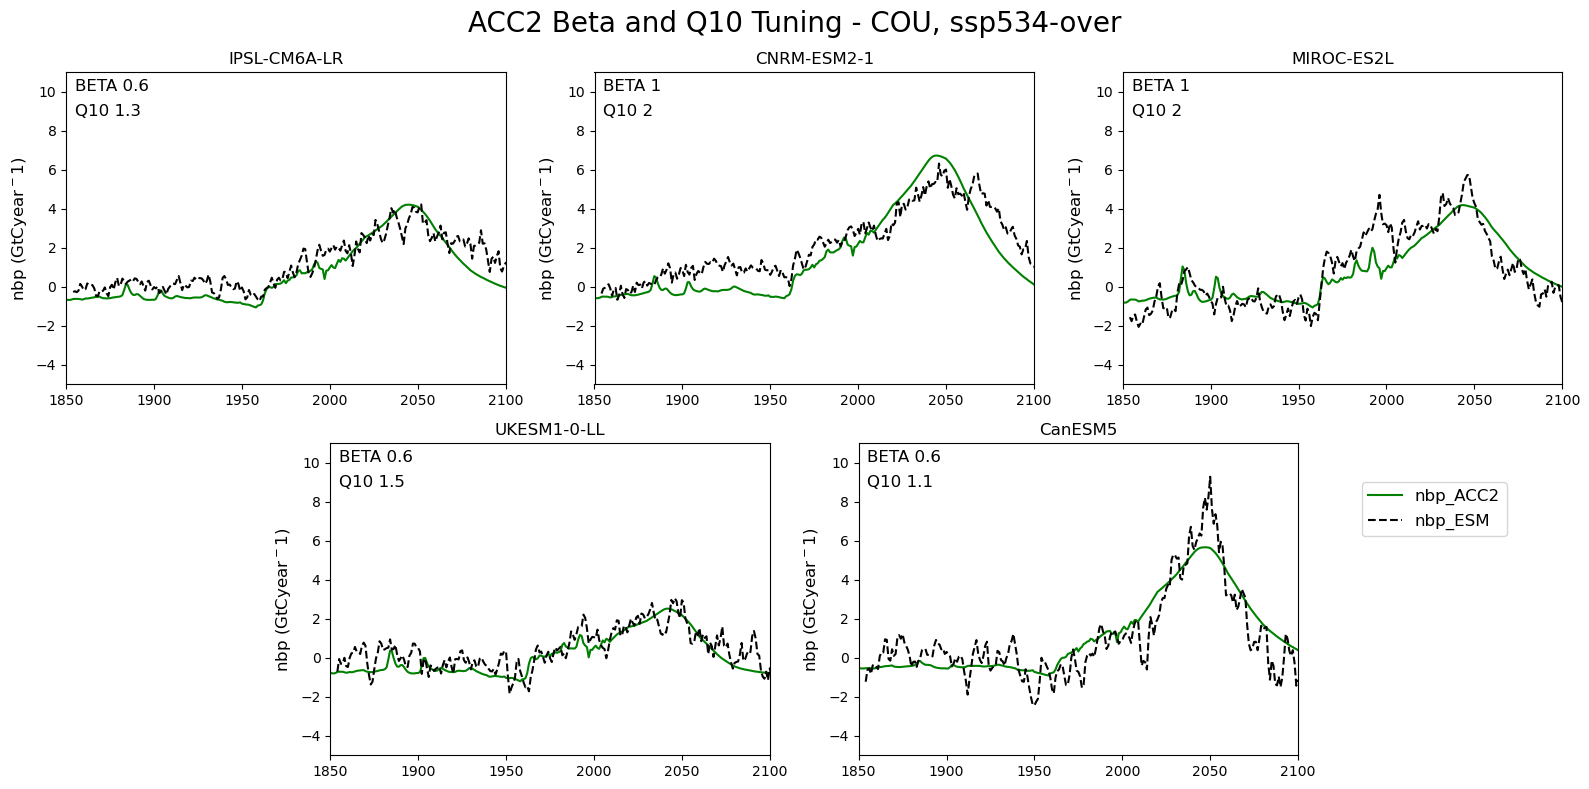

In [10]:
## -- MULTIPLE PLOT 5
out_path = "C:/Users/mastr/Documents/LSCE/RESULTS"

## -------------------- DATA ---------------------##

# CO2 = GtC
# CH4 = MtCH4

width_inch = 16
height_inch = 8

data_path = 'C:/Users/mastr/Documents/LSCE/Carbon Budget'                   ## MAC OS
file = "/ACC2_ESM_tuning_ssp534.xlsx"

df_esm= pd.read_excel(os.path.join(data_path+file), sheet_name = [0,1,6])
esm = df_esm[0].drop(columns="year", axis=1).columns
luc_emissions = df_esm[6].drop(columns="year", axis=1).to_numpy()

time_acc2 = np.repeat(np.arange(1750,2301),1)
time_esm = df_esm[1].iloc[100:,0]   
#time_esm = np.repeat(np.arange(1850,2301),1)

run = "COU"
var = "LND"

if run == "BGC":
    best = np.int64(bestgcm)
    bestparams = bestparamsbgc
    nbp_esm = df_esm[0].drop(columns="year", axis=1)

if run =="COU":
    best = np.int64(bestcou)
    bestparams = bestparamscou
    nbp_esm = df_esm[1].drop(columns="year", axis=1)


## -------------------- PLOT ---------------------##

title = "ACC2 Beta and Q10 Tuning - " + run + ", ssp534-over"

# Manually create subplots

fig = plt.figure(figsize=(width_inch, height_inch)) #, constrained_layout=True)
gs = gridspec.GridSpec(2, 6)

# Iteratively create subplots
for i, ax in enumerate(nbp_esm.columns):

    if i < 3:
        ax = fig.add_subplot(gs[0, 2 * i:2 * i + 2])
    if ((i > 2) and (i < 5)):
        ax = fig.add_subplot(gs[1, 2 * i - 5:2 * i + 2 - 5])

    if i==0:
        file = "/tuningBETA&Q10_" + run + "/" + var + "_ipsl.csv"
    if i==1:
        file = "/tuningBETA&Q10_" + run + "/" + var + "_cnrm.csv"
    if i==2:
        file = "/tuningBETA&Q10_" + run + "/" + var + "_miroc.csv"
    if i==3:
        file = "/tuningBETA&Q10_" + run + "/" + var + "_ukesm.csv"
    if i==4:
        file = "/tuningBETA&Q10_" + run + "/" + var + "_ukesm.csv"

    ## Import ACC2 simulations data
    df_acc2 = pd.read_csv(os.path.join(data_path+file))
    time_acc2 = df_acc2.iloc[:,0]
    nbp_acc2 = df_acc2.drop(columns="Year", axis=1).to_numpy()
    
    nbp_acc2 = nbp_acc2 - luc_emissions

    params = df_acc2.drop(columns="Year", axis=1).columns

    if i==0:
        ax.plot(time_acc2[100:],nbp_acc2[100:,best[0][0]],label=params, color='green', linewidth=1.5)
        ax.text(0.02, 0.98, 'BETA {}'.format(bestparams[i][0:3]),verticalalignment='top', horizontalalignment='left',transform=ax.transAxes, fontsize=12)
        ax.text(0.02, 0.90, 'Q10 {}'.format(bestparams[i][4:8]),verticalalignment='top', horizontalalignment='left',transform=ax.transAxes, fontsize=12)

    if i==1:
        ax.plot(time_acc2[100:],nbp_acc2[100:,best[1][0]],label=params, color='green', linewidth=1.5)
        ax.text(0.02, 0.98, 'BETA {}'.format(1),verticalalignment='top', horizontalalignment='left',transform=ax.transAxes, fontsize=12)
        ax.text(0.02, 0.90, 'Q10 {}'.format(2),verticalalignment='top', horizontalalignment='left',transform=ax.transAxes, fontsize=12)

    if i==2:
        ax.plot(time_acc2[100:],nbp_acc2[100:,best[2][0]],label=params, color='green', linewidth=1.5)
        ax.text(0.02, 0.98, 'BETA {}'.format(1),verticalalignment='top', horizontalalignment='left',transform=ax.transAxes, fontsize=12)
        ax.text(0.02, 0.90, 'Q10 {}'.format(2),verticalalignment='top', horizontalalignment='left',transform=ax.transAxes, fontsize=12)

    if i==3:
        ax.plot(time_acc2[100:],nbp_acc2[100:,best[3][0]],label=params, color='green', linewidth=1.5)
        ax.text(0.02, 0.98, 'BETA {}'.format(bestparams[i][0:3]),verticalalignment='top', horizontalalignment='left',transform=ax.transAxes, fontsize=12)
        ax.text(0.02, 0.90, 'Q10 {}'.format(bestparams[i][4:8]),verticalalignment='top', horizontalalignment='left',transform=ax.transAxes, fontsize=12)

    if i==4:
        ax.plot(time_acc2[100:],nbp_acc2[100:,best[4][0]],label=params, color='green', linewidth=1.5)
        ax.text(0.02, 0.98, 'BETA {}'.format(bestparams[i][0:3]),verticalalignment='top', horizontalalignment='left',transform=ax.transAxes, fontsize=12)
        ax.text(0.02, 0.90, 'Q10 {}'.format(bestparams[i][4:8]),verticalalignment='top', horizontalalignment='left',transform=ax.transAxes, fontsize=12)

    ax.plot(time_esm,nbp_esm.iloc[100:,i].rolling(window=5).mean(), color='black', linewidth=1.5, ls='--')

    ax.set_xlim(1850,2100)
    ax.set_ylim(-5,11)
    ax.set_ylabel('nbp (GtCyear$^-1$)', labelpad = 5, size = 12) # (GtCyear$^-1$)
    ax.set_title(esm[i])

fig.legend(["nbp_ACC2","nbp_ESM"], title_fontsize = 14, loc='upper right',bbox_to_anchor=(0.95, 0.4),fontsize=12)
fig.suptitle(title, fontsize = 20)
fig.tight_layout()

output_file = os.path.join(out_path,title) + "LND_withcanesm.png"
#plt.savefig(output_file, bbox_inches = "tight")
plt.show()
plt.close()

### Unique plot with different colors for each ESM

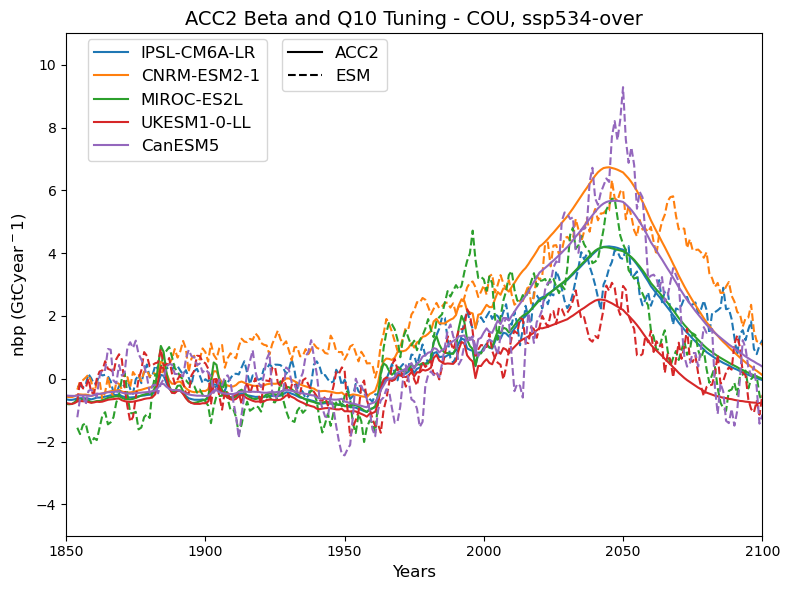

In [138]:
## -- MULTIPLE PLOT 5
out_path = "C:/Users/mastr/Documents/LSCE/RESULTS"

## -------------------- DATA ---------------------##

# CO2 = GtC
# CH4 = MtCH4

width_inch = 8
height_inch = 6

data_path = 'C:/Users/mastr/Documents/LSCE/Carbon Budget'               
file = "/ACC2_ESM_tuning_ssp534.xlsx"

df_esm= pd.read_excel(os.path.join(data_path+file), sheet_name = [0,1,6])
esm = df_esm[0].drop(columns="year", axis=1).columns
luc_emissions = df_esm[6].drop(columns="year", axis=1).to_numpy()

time_acc2 = np.repeat(np.arange(1750,2301),1)
time_esm = df_esm[1].iloc[100:,0]   
#time_esm = np.repeat(np.arange(1850,2301),1)

run = "COU"
var = "LND"

if run == "BGC":
    best = np.int64(bestgcm)
    bestparams = bestparamsbgc
    nbp_esm = df_esm[0].drop(columns="year", axis=1)

if run =="COU":
    best = np.int64(bestcou)
    bestparams = bestparamscou
    nbp_esm = df_esm[1].drop(columns="year", axis=1)

models = [ 'IPSL-CM6A-LR', 'CNRM-ESM2-1', 'MIROC-ES2L', 'UKESM1-0-LL', 'CanESM5']

## -------------------- PLOT ---------------------##

title = "ACC2 Beta and Q10 Tuning - " + run + ", ssp534-over"

# Manually create subplots

fig = plt.figure(figsize=(width_inch, height_inch)) #, constrained_layout=True)

ax = plt.subplot()

# Iteratively create subplots
for i,item in enumerate(nbp_esm.columns):
    color=next(ax._get_lines.prop_cycler)['color']
    linestyles = ['-', "--"]

    if i==0:
        file = "/tuningBETA&Q10_" + run + "/" + var + "_ipsl.csv"
    if i==1:
        file = "/tuningBETA&Q10_" + run + "/" + var + "_cnrm.csv"
    if i==2:
        file = "/tuningBETA&Q10_" + run + "/" + var + "_miroc.csv"
    if i==3:
        file = "/tuningBETA&Q10_" + run + "/" + var + "_ukesm.csv"
    if i==4:
        file = "/tuningBETA&Q10_" + run + "/" + var + "_ukesm.csv"

    ## Import ACC2 simulations data
    df_acc2 = pd.read_csv(os.path.join(data_path+file))
    time_acc2 = df_acc2.iloc[:,0]
    nbp_acc2 = df_acc2.drop(columns="Year", axis=1).to_numpy()
    nbp_acc2 = nbp_acc2 - luc_emissions
    # params = df_acc2.drop(columns="Year", axis=1).columns

    ax.plot(time_acc2[100:],nbp_acc2[100:,best[i][0]], color = color, linewidth=1.5, ls= linestyles[0])
    ax.plot(time_esm,nbp_esm.iloc[100:,i].rolling(window=5).mean(), color = color,  label='_nolegend_', linewidth=1.5, ls= linestyles[1])

    ax.set_xlim(1850,2100)
    ax.set_ylim(-5,11)
    ax.set_ylabel('nbp (GtCyear$^-1$)', labelpad = 5, size = 12) # (GtCyear$^-1$)
    ax.set_xlabel("Years", fontsize = 12)

#dummy lines with NO entries, just to create the black style legend

dummy_lines = []
for b_idx, b in enumerate(np.arange(2)):
    dummy_lines.append(ax.plot([],[], c="black", ls = linestyles[b_idx])[0])

ax.set_title(title, size = 14)
fig.legend(models, loc='upper right',bbox_to_anchor=(0.35, 0.94),fontsize=12)
fig.legend([dummy_lines[i] for i in [0,1]],["ACC2","ESM"], loc='upper right',bbox_to_anchor=(0.5, 0.94),fontsize=12)
fig.tight_layout()

out_path = "C:/Users/mastr/Documents/LSCE/RESULTS/ACC2_Carbon Emulator tuning"
output_file = os.path.join(out_path,title) + "LND_withcanesm_oneplot_update.png"
# plt.savefig(output_file, bbox_inches = "tight")
plt.show()
plt.close()

### Evaluation of ACC2 tuning with IPSL multi SSP scenario

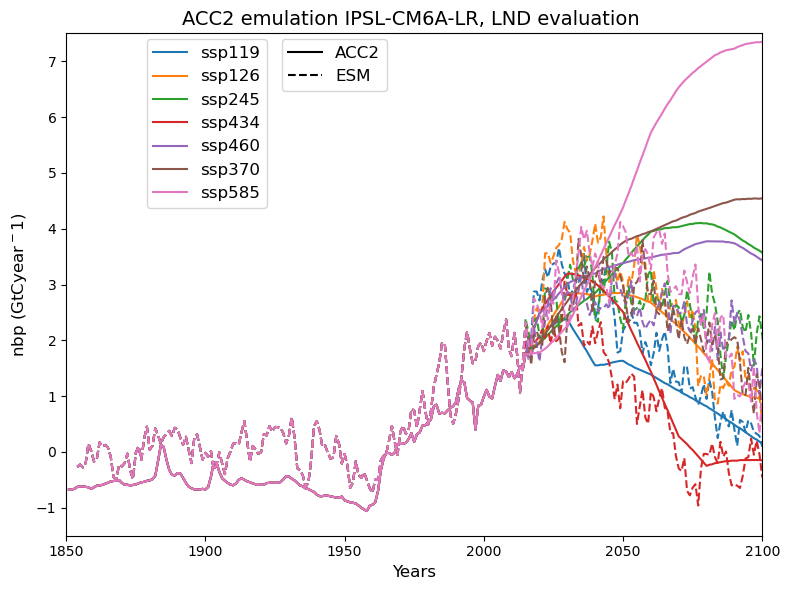

In [18]:
## -- MULTIPLE PLOT 5
out_path = "C:/Users/mastr/Documents/LSCE/RESULTS"

## -------------------- DATA ---------------------##

# CO2 = GtC
# CH4 = MtCH4

width_inch = 8
height_inch = 6

data_path = 'C:/Users/mastr/Documents/LSCE/Carbon Budget/ACC2emulator_IPSL_evaluation'               ## MAC OS
file = "/ACC2_ESM_IPSL_eval.xlsx"

df_esm= pd.read_excel(os.path.join(data_path+file), sheet_name = [0,1,2,3])
luc_emissions = df_esm[3].drop(columns="year", axis=1)#.to_numpy()

time_acc2 = np.repeat(np.arange(1750,2301),1)
time_esm = df_esm[1].iloc[100:,0]   
#time_esm = np.repeat(np.arange(1850,2301),1)

run = "COU"
var = "LND"

best = np.int64(bestcou)
bestparams = bestparamscou
if var == "LND":
    nbp_esm = df_esm[0].drop(columns="year", axis=1)
if var == "T2M":
    nbp_esm = df_esm[2].drop(columns="year", axis=1)
if var == "OCN":
    nbp_esm = df_esm[1].drop(columns="year", axis=1)

scenarios = [ 'ssp119', 'ssp126', 'ssp245', 'ssp434', 'ssp460', 'ssp370', 'ssp585' ]

## -------------------- PLOT ---------------------##

title = "ACC2 emulation IPSL-CM6A-LR, " + var + " evaluation "

# Manually create subplots

fig = plt.figure(figsize=(width_inch, height_inch)) #, constrained_layout=True)

ax = plt.subplot()

# Iteratively create subplots
for i,item in enumerate(scenarios):
    color=next(ax._get_lines.prop_cycler)['color']
    linestyles = ['-', "--"]

    file = "/" + var + "_ipsl" + "_eval_" + item + ".csv"
    ## Import ACC2 simulations data
    df_acc2 = pd.read_csv(os.path.join(data_path+file))
    nbp_acc2 = df_acc2.iloc[:, 1:]
    # nbp_acc2.columns = [item]
    if var == "LND":
        nbp_acc2 = np.concatenate(nbp_acc2.to_numpy(),axis =0) - luc_emissions[item][1:].to_numpy()
    else:
        nbp_acc2 = nbp_acc2
    # params = df_acc2.drop(columns="Year", axis=1).columns

    ax.plot(time_acc2[101:],nbp_acc2[100:], color = color, linewidth=1.5, ls= linestyles[0])
    ax.plot(time_esm,nbp_esm[item].iloc[100:].rolling(window=5).mean(), color = color,  label='_nolegend_', linewidth=1.5, ls= linestyles[1])

    ax.set_xlim(1850,2100)
    ax.set_ylim(-1.5,7.5)

    if var == "LND":
        ax.set_ylabel('nbp (GtCyear$^-1$)', labelpad = 5, size = 12)
    if var == "T2M":
        ax.set_ylabel('Temperature (degC)', labelpad = 5, size = 12)
    if var == "OCN":
        ax.set_ylabel('sea-air carbon fluxes (GtCyear$^-1$)', labelpad = 5, size = 12)

     # (GtCyear$^-1$)
    ax.set_xlabel("Years", fontsize = 12)

#dummy lines with NO entries, just to create the black style legend

dummy_lines = []
for b_idx, b in enumerate(np.arange(2)):
    dummy_lines.append(ax.plot([],[], c="black", ls = linestyles[b_idx])[0])

ax.set_title(title, size = 14)
fig.legend(scenarios, loc='upper right',bbox_to_anchor=(0.35, 0.94),fontsize=12)
fig.legend([dummy_lines[i] for i in [0,1]],["ACC2","ESM"], loc='upper right',bbox_to_anchor=(0.5, 0.94),fontsize=12)
fig.tight_layout()

out_path = "C:/Users/mastr/Documents/LSCE/RESULTS/ACC2_Carbon Emulator tuning"
output_file = os.path.join(out_path,title) + ".png"
plt.savefig(output_file, bbox_inches = "tight")
plt.show()
plt.close()

### 3D scatterplot of BETA, Q10 and RMSE values

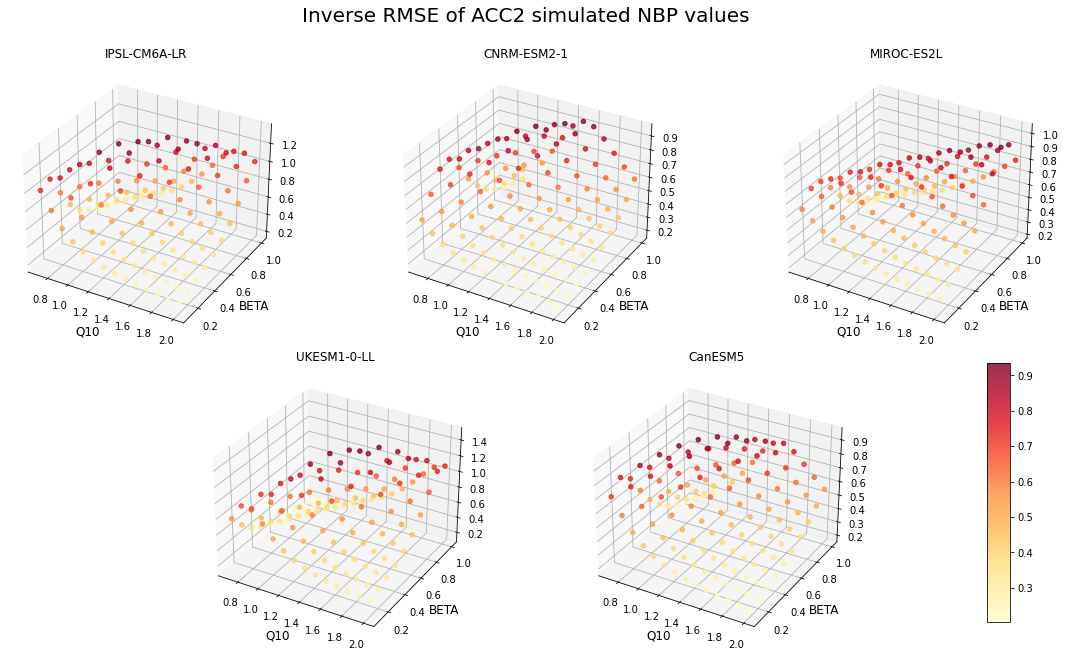

<Figure size 432x288 with 0 Axes>

In [202]:
# Import libraries
from mpl_toolkits import mplot3d

# Convert List of Parameters into list of float numbers
# First split list into BETA and Q10, then use map() to transform into list of numbers
paramsbeta = []
for i,n in enumerate(params):
    if params[i][3] == '-':
        content = params[i][0:3]
    if params[i][3] == '.':
        content = params[i][0:1]
    paramsbeta.append(content)
paramsbeta = list(map(float, paramsbeta))

paramsq10 = []
for i,n in enumerate(params):
    if params[i][3] == '-':
        content = params[i][4:]
    if params[i][3] == '.':
        content = params[i][2:]
    paramsq10.append(content)
paramsq10 = list(map(float, paramsq10))

# Creating figure
fig = plt.figure(figsize = (16, 9))

# Creating color map
my_cmap = plt.get_cmap('YlOrRd')

for i in [0, 1, 2, 3, 4]:

    if i < 3:
        ax = fig.add_subplot(gs[0, 2 * i:2 * i + 2], projection='3d')
    if ((i > 2) and (i < 5)):
        ax = fig.add_subplot(gs[1, 2 * i - 5:2 * i + 2 - 5], projection='3d')

# Creating dataset
    z = 1/tas_diff[i,:]
    x = paramsq10
    y = paramsbeta

# Creating plot
    sctt = ax.scatter3D(x, y, z,
        alpha = 0.8,
        c = (z),
        cmap = my_cmap,
        marker ='o')
    ax.set_xlabel('Q10', size = 12)
    ax.set_ylabel('BETA', size = 12)

    #plt.title("IPSL-CM6A-LR")
    if i==0:
        plt.title("IPSL-CM6A-LR")
    if i==1:
        plt.title("CNRM-ESM2-1")
    if i==2:
        plt.title("MIROC-ES2L")
    if i==3:
        plt.title("UKESM1-0-LL")
    if i==4:
        plt.title("CanESM5")
        
title = "Inverse RMSE of ACC2 simulated NBP values"
plt.suptitle(title, fontsize = 20, y=1)
#ax.set_zlabel('RMSE$^{-1}$', fontweight ='bold', size = 12, labelpad = 10)
fig.subplots_adjust(bottom=0.2, top=0.95, left=0.1, right=0.8, wspace=0.0, hspace=0.25)
cbar_ax = fig.add_axes([0.9, 0.05, 0.02, 0.4])                     # Left, Bottom, Width, Height

fig.colorbar(sctt, cax=cbar_ax)
fig.tight_layout()

# show plot
plt.show()

# Save plot
out_path = "/Users/mmastro/Documents/LSCE/RESULTS/ACC2_Carbon Emulator tuning"
output_file = os.path.join(out_path,title) + ".png"
plt.savefig(output_file)



### 3D Surface Plot

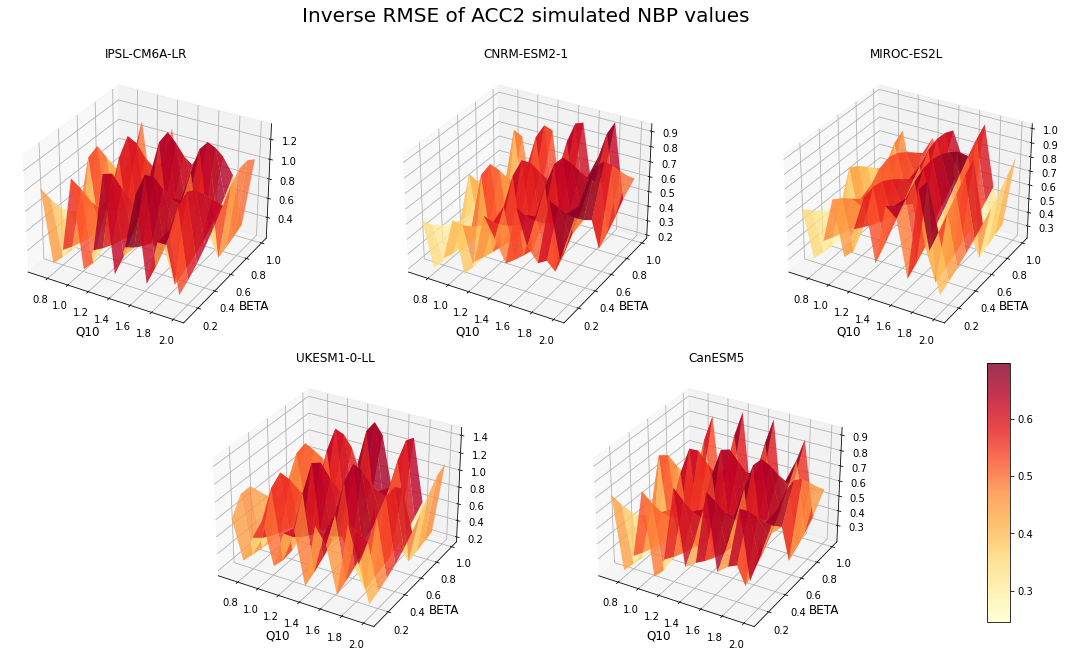

In [246]:
# Import libraries
from mpl_toolkits import mplot3d

paramsbeta = np.arange(0.1,1.1,0.1)
paramsq10 = np.arange(0.7,2.1,0.1)

# Creating figure
fig = plt.figure(figsize = (16, 9))

# Creating color map
my_cmap = plt.get_cmap('YlOrRd')

for i in [0, 1, 2, 3, 4]:

    if i < 3:
        ax = fig.add_subplot(gs[0, 2 * i:2 * i + 2], projection='3d')
    if ((i > 2) and (i < 5)):
        ax = fig.add_subplot(gs[1, 2 * i - 5:2 * i + 2 - 5], projection='3d')

# Creating dataset
    x = paramsq10
    y = paramsbeta
    z = 1/tas_diff[i,:].reshape(len(x), len(y)).T
    X, Y = np.meshgrid(x, y)
# Creating plot
    sctt = ax.plot_surface(X, Y, z,
        alpha = 0.8,
        #c = (z),
        cmap = my_cmap)

    ax.set_xlabel('Q10', size = 12)
    ax.set_ylabel('BETA', size = 12)

    #plt.title("IPSL-CM6A-LR")
    if i==0:
        plt.title("IPSL-CM6A-LR")
    if i==1:
        plt.title("CNRM-ESM2-1")
    if i==2:
        plt.title("MIROC-ES2L")
    if i==3:
        plt.title("UKESM1-0-LL")
    if i==4:
        plt.title("CanESM5")
        
title = "Inverse RMSE of ACC2 simulated NBP values"
plt.suptitle(title, fontsize = 20, y=1)
#ax.set_zlabel('RMSE$^{-1}$', fontweight ='bold', size = 12, labelpad = 10)
fig.subplots_adjust(bottom=0.2, top=0.95, left=0.1, right=0.8, wspace=0.0, hspace=0.25)
cbar_ax = fig.add_axes([0.9, 0.05, 0.02, 0.4])                     # Left, Bottom, Width, Height

clb = fig.colorbar(sctt, cax=cbar_ax)
fig.tight_layout()

# Save plot
out_path = "/Users/mmastro/Documents/LSCE/RESULTS/ACC2_Carbon Emulator tuning"
output_file = os.path.join(out_path,title) + "_3D.png"
plt.savefig(output_file)
plt.show()
plt.close()

### Contour Plot of RMSE of BETA and Q10

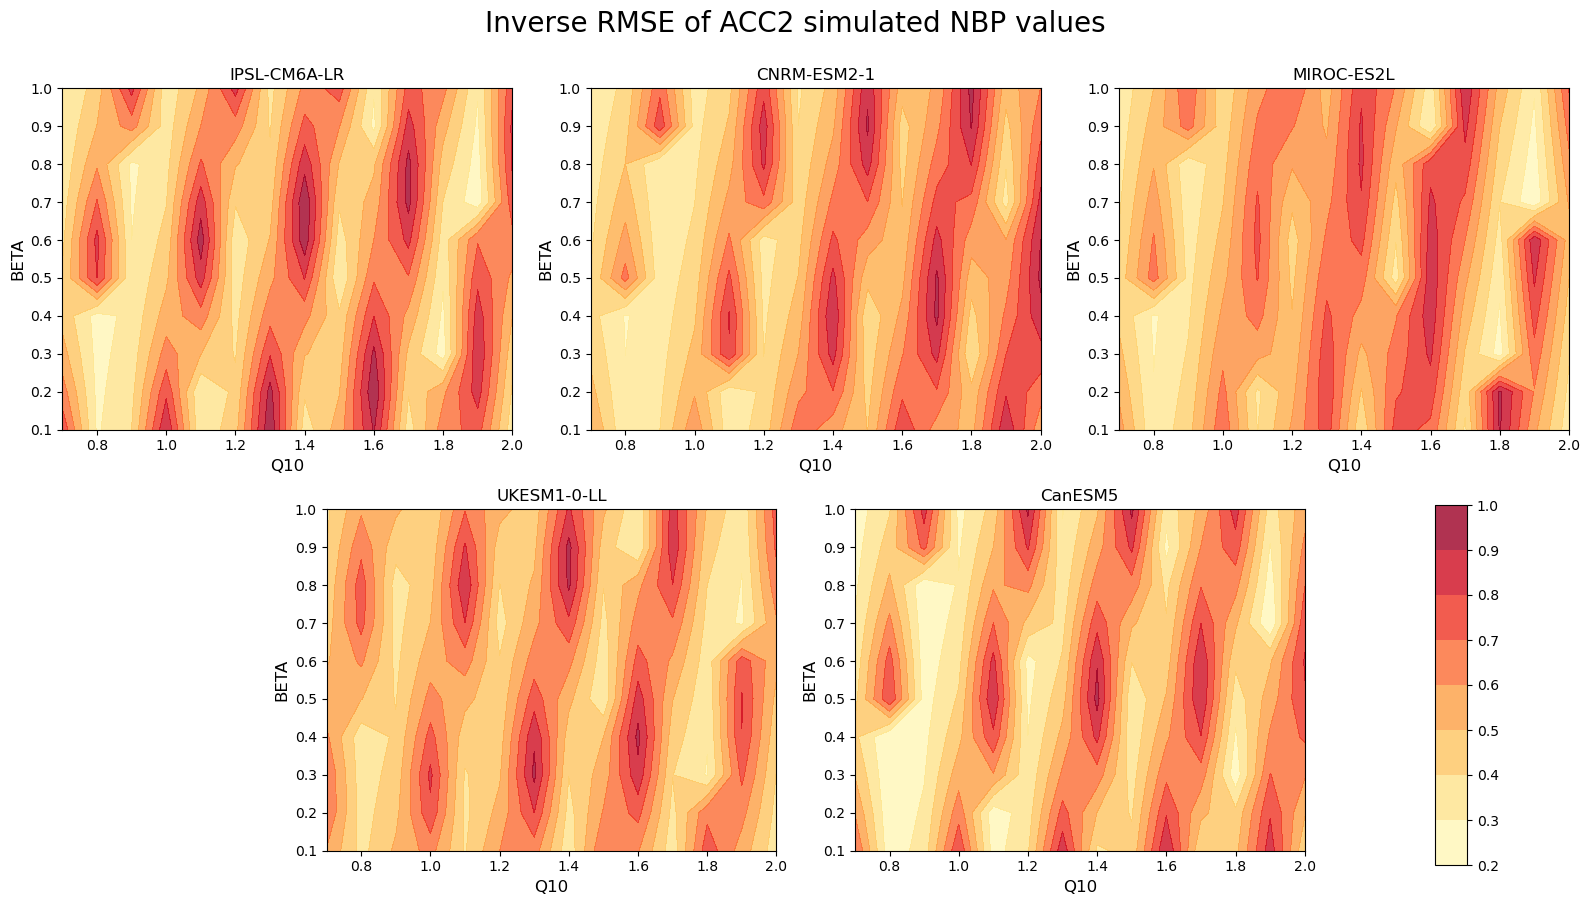

In [26]:
# Import libraries

paramsbeta = np.arange(0.1,1.1,0.1)
paramsq10 = np.arange(0.7,2.1,0.1)

# Creating figure
fig = plt.figure(figsize = (16, 9))
gs = gridspec.GridSpec(2, 6)

# Creating color map
my_cmap = plt.get_cmap('YlOrRd')

for i in [0, 1, 2, 3, 4]:

    if i < 3:
        ax = fig.add_subplot(gs[0, 2 * i:2 * i + 2])
    if ((i > 2) and (i < 5)):
        ax = fig.add_subplot(gs[1, 2 * i - 5:2 * i + 2 - 5])

# Creating dataset
    x = paramsq10
    y = paramsbeta
    z = 1/tas_diff[i,:].reshape(len(x), len(y)).T

# Creating plot
    sctt = ax.contourf(x, y, z,
        alpha = 0.8,
        c = (z),
        cmap = my_cmap)
        
    ax.set_xlabel('Q10', size = 12)
    ax.set_ylabel('BETA', size = 12)

    #plt.title("IPSL-CM6A-LR")
    if i==0:
        plt.title("IPSL-CM6A-LR")
    if i==1:
        plt.title("CNRM-ESM2-1")
    if i==2:
        plt.title("MIROC-ES2L")
    if i==3:
        plt.title("UKESM1-0-LL")
    if i==4:
        plt.title("CanESM5")
        
title = "Inverse RMSE of ACC2 simulated NBP values"
plt.suptitle(title, fontsize = 20, y=1)

fig.subplots_adjust(bottom=0.2, top=0.95, left=0.1, right=0.8, wspace=0.0, hspace=0.25)
cbar_ax = fig.add_axes([0.9, 0.05, 0.02, 0.4])                     # Left, Bottom, Width, Height

clb = fig.colorbar(sctt, cax=cbar_ax)
fig.tight_layout()

# Save plot
out_path = "C:/Users/mastr/LSCE/RESULTS/ACC2_Carbon Emulator tuning"
output_file = os.path.join(out_path,title) + ".png"
# plt.savefig(output_file)
plt.show()
plt.close()

## fgco2


In [ ]:
## -- MULTIPLE PLOT 4

## -------------------- DATA ---------------------##

# CO2 = GtC
# CH4 = MtCH4

data_path = '/Users/mmastro/Documents/LSCE/Carbon Budget'               ## MAC OS
file = "/ACC2_ESM_tuning.xlsx"

df_esm= pd.read_excel(os.path.join(data_path+file), sheet_name = [2,3])
esm = df_esm[2].drop(columns="year", axis=1).columns

time_acc2 = np.repeat(np.arange(1750,2301),1)
time_esm = df_esm[2].iloc[100:,0]   
#time_esm = np.repeat(np.arange(1850,2301),1)

var = "OCN"
run = "COU"

if run == "BGC":
    best = bestgcm
    bestparams = bestparamsbgc
    nbp_esm = df_esm[2].drop(columns="year", axis=1)

if run =="COU":
    best = bestcou
    bestparams = bestparamscou
    nbp_esm = df_esm[2].drop(columns="year", axis=1)

## -------------------- PLOT ---------------------##

title = "ACC2 Beta and Q10 Tuning - " + run + ", ssp534-over"

# Manually create subplots

width_inch = 16
height_inch = 8

fig, axs  = plt.subplots(nrows=2, ncols=2,figsize=(width_inch, height_inch)) #, constrained_layout=True)

# Iteratively create subplots
for i, ax in enumerate(axs.flatten()):

    if i==0:
        file = "/tuningBETA&Q10_" + run + "/" + var + "_ipsl.csv"
    if i==1:
        file = "/tuningBETA&Q10_" + run + "/" + var + "_cnrm.csv"
    if i==2:
        file = "/tuningBETA&Q10_" + run + "/" + var + "_miroc.csv"
    if i==3:
        file = "/tuningBETA&Q10_" + run + "/" + var + "_ukesm.csv"

    ## Import ACC2 simulations data
    df_acc2 = pd.read_csv(os.path.join(data_path+file))
    time_acc2 = df_acc2.iloc[:,0]   
    nbp_acc2 = df_acc2.drop(columns="Year", axis=1)
    
    nbp_acc2 = nbp_acc2 

    params = df_acc2.drop(columns="Year", axis=1).columns

    #color = iter(cm.Greens_r(np.linspace(0.8, 0, len(nbp_acc2.T))))
    #for x, item in enumerate(params):
        #c = next(color)
    if i==0:
        ax.plot(time_acc2[100:],nbp_acc2.iloc[100:,best[0]],label=params, color="blue", linewidth=1.5)
        ax.text(0.02, 0.98, 'BETA {}'.format(bestparams[i][0:3]),verticalalignment='top', horizontalalignment='left',transform=ax.transAxes, fontsize=12)
        ax.text(0.02, 0.90, 'Q10 {}'.format(bestparams[i][4:8]),verticalalignment='top', horizontalalignment='left',transform=ax.transAxes, fontsize=12)

    if i==1:
        ax.plot(time_acc2[100:],nbp_acc2.iloc[100:,best[1]],label=params, color="blue", linewidth=1.5)
        ax.text(0.02, 0.98, 'BETA {}'.format(bestparams[i][0]),verticalalignment='top', horizontalalignment='left',transform=ax.transAxes, fontsize=12)
        ax.text(0.02, 0.90, 'Q10 {}'.format(bestparams[i][2:7]),verticalalignment='top', horizontalalignment='left',transform=ax.transAxes, fontsize=12)

    if i==2:
        ax.plot(time_acc2[100:],nbp_acc2.iloc[100:,best[2]],label=params, color="blue", linewidth=1.5)
        ax.text(0.02, 0.98, 'BETA {}'.format(1),verticalalignment='top', horizontalalignment='left',transform=ax.transAxes, fontsize=12)
        ax.text(0.02, 0.90, 'Q10 {}'.format(2),verticalalignment='top', horizontalalignment='left',transform=ax.transAxes, fontsize=12)

    if i==3:
        ax.plot(time_acc2[100:],nbp_acc2.iloc[100:,best[3]],label=params, color="blue", linewidth=1.5)
        ax.text(0.02, 0.98, 'BETA {}'.format(bestparams[i][0:3]),verticalalignment='top', horizontalalignment='left',transform=ax.transAxes, fontsize=12)
        ax.text(0.02, 0.90, 'Q10 {}'.format(bestparams[i][4:8]),verticalalignment='top', horizontalalignment='left',transform=ax.transAxes, fontsize=12)

    ax.plot(time_esm,nbp_esm.iloc[100:,i].rolling(window=5).mean(), color='black', linewidth=1.5, ls='--')

    ax.set_xlim(1850,2100)
    ax.set_ylim(-2,6)
    ax.set_ylabel('fgco2 (GtCyear$^-1$)', labelpad = 5, size = 12) 
    ax.set_title(esm[i])

fig.legend(["ocn uptake_ACC2","ocn uptake_ESM"], title_fontsize = 14, loc='upper right',bbox_to_anchor=(0.95, 0.2),fontsize=12)
fig.suptitle(title, fontsize = 20)
fig.tight_layout()

out_path = "/Users/mmastro/Documents/LSCE/RESULTS/ACC2_Carbon Emulator tuning"
output_file = os.path.join(out_path,title) + "OCN.png"
plt.savefig(output_file, bbox_inches = "tight")
#plt.show()
#plt.close()

## tas

In [ ]:
## -- MULTIPLE PLOT 4

## -------------------- DATA ---------------------##

# CO2 = GtC
# CH4 = MtCH4

data_path = '/Users/mmastro/Documents/LSCE/Carbon Budget'               ## MAC OS
file = "/ACC2_ESM_tuning.xlsx"

df_esm= pd.read_excel(os.path.join(data_path+file), sheet_name = [4,5])
esm = df_esm[4].drop(columns="year", axis=1).columns

time_acc2 = np.repeat(np.arange(1750,2301),1)
time_esm = df_esm[4].iloc[100:,0]   
#time_esm = np.repeat(np.arange(1850,2301),1)

var = "T2M"
run = "BGC"

if run == "BGC":
    best = bestgcm
    bestparams = bestparamsbgc
    nbp_esm = df_esm[4].drop(columns="year", axis=1)

if run =="COU":
    best = bestcou
    bestparams = bestparamscou
    nbp_esm = df_esm[5].drop(columns="year", axis=1)

## -------------------- PLOT ---------------------##

title = "ACC2 Beta and Q10 Tuning - " + run + ", ssp534-over"

# Manually create subplots

width_inch = 16
height_inch = 8

fig, axs  = plt.subplots(nrows=2, ncols=2,figsize=(width_inch, height_inch)) #, constrained_layout=True)

# Iteratively create subplots
for i, ax in enumerate(axs.flatten()):

    if i==0:
        file = "/tuningBETA&Q10_" + run + "/" + var + "_ipsl.csv"
    if i==1:
        file = "/tuningBETA&Q10_" + run + "/" + var + "_cnrm.csv"
    if i==2:
        file = "/tuningBETA&Q10_" + run + "/" + var + "_miroc.csv"
    if i==3:
        file = "/tuningBETA&Q10_" + run + "/" + var + "_ukesm.csv"

    ## Import ACC2 simulations data
    df_acc2 = pd.read_csv(os.path.join(data_path+file))
    time_acc2 = df_acc2.iloc[:,0]   
    nbp_acc2 = df_acc2.drop(columns="Year", axis=1)
    
    nbp_acc2 = nbp_acc2 #- luc_emissions.values

    params = df_acc2.drop(columns="Year", axis=1).columns

    #color = iter(cm.Greens_r(np.linspace(0.8, 0, len(nbp_acc2.T))))
    #for x, item in enumerate(params):
        #c = next(color)
    if i==0:
        ax.plot(time_acc2[100:],nbp_acc2.iloc[100:,best[0]],label=params, color="red", linewidth=1.5)
        ax.text(0.02, 0.98, 'BETA {}'.format(bestparams[i][0:3]),verticalalignment='top', horizontalalignment='left',transform=ax.transAxes, fontsize=12)
        ax.text(0.02, 0.90, 'Q10 {}'.format(bestparams[i][4:8]),verticalalignment='top', horizontalalignment='left',transform=ax.transAxes, fontsize=12)

    if i==1:
        ax.plot(time_acc2[100:],nbp_acc2.iloc[100:,best[1]],label=params, color="red", linewidth=1.5)
        ax.text(0.02, 0.98, 'BETA {}'.format(bestparams[i][0:3]),verticalalignment='top', horizontalalignment='left',transform=ax.transAxes, fontsize=12)
        ax.text(0.02, 0.90, 'Q10 {}'.format(bestparams[i][4:8]),verticalalignment='top', horizontalalignment='left',transform=ax.transAxes, fontsize=12)

    if i==2:
        ax.plot(time_acc2[100:],nbp_acc2.iloc[100:,139],label=params, color="red", linewidth=1.5)
        ax.text(0.02, 0.98, 'BETA {}'.format(1),verticalalignment='top', horizontalalignment='left',transform=ax.transAxes, fontsize=12)
        ax.text(0.02, 0.90, 'Q10 {}'.format(2),verticalalignment='top', horizontalalignment='left',transform=ax.transAxes, fontsize=12)

    if i==3:
        ax.plot(time_acc2[100:],nbp_acc2.iloc[100:,best[3]],label=params, color="red", linewidth=1.5)
        ax.text(0.02, 0.98, 'BETA {}'.format(bestparams[i][0:3]),verticalalignment='top', horizontalalignment='left',transform=ax.transAxes, fontsize=12)
        ax.text(0.02, 0.90, 'Q10 {}'.format(bestparams[i][4:8]),verticalalignment='top', horizontalalignment='left',transform=ax.transAxes, fontsize=12)

    ax.plot(time_esm,nbp_esm.iloc[100:,i].rolling(window=5).mean(), color='black', linewidth=1.5, ls='--')

    ax.set_xlim(1850,2100)
    ax.set_ylim(-1,4)
    ax.set_ylabel('degC', labelpad = 5, size = 12) # (GtCyear$^-1$)
    ax.set_title(esm[i])

fig.legend(["t2m_ACC2","t2m_ESM"], title_fontsize = 14, loc='upper right',bbox_to_anchor=(0.95, 0.4),fontsize=12)
fig.suptitle(title, fontsize = 20)
fig.tight_layout()

out_path = "/Users/mmastro/Documents/LSCE/RESULTS/ACC2_Carbon Emulator tuning"
output_file = os.path.join(out_path,title) + "T2M.png"
plt.savefig(output_file, bbox_inches = "tight")
#plt.show()
#plt.close()